In [2]:
import numpy as np
import pandas as pd
import gc 

In [3]:
!ls fb_datathon_dataset/ml_preds_csv 

ls: fb_datathon_dataset/ml_preds_csv: No such file or directory


In [4]:
!ls fb_datathon_dataset/

ls: fb_datathon_dataset/: No such file or directory


# Order of the map
### We did not know that you actually ordered the map for us.... But it works!!

In [6]:
ls

Data/                                main.ipynb*
Datathon Challenge_ Map With AI.pdf


In [8]:
#Map list
import glob, os
parent_dir = 'Data/ml_preds_csv/'
listOfFile=[]
for pdf_file in glob.glob(os.path.join(parent_dir, '*.csv')):
    a=pdf_file.split('/')[2].split('.')
    listOfFile.append(int(a[0]))
    
print(len(listOfFile))
listOfFile[:5]

64


[3001120103333, 3001120103131, 3001120103130, 3001120103332, 3001120103330]

In [10]:
#Pixel distance
map_=3001120103000
df_temp=pd.read_csv("Data/ml_preds_csv/{}.csv".format(map_))
df_temp.head()

,pixel_i,pixel_j,val,latitude,longitude
0,0,424,6,-5.965754,35.510087
1,0,425,7,-5.965754,35.510092
2,0,426,8,-5.965754,35.510098
3,0,427,9,-5.965754,35.510103
4,0,428,8,-5.965754,35.510108


In [11]:
#Constant
j_unit=np.abs(df_temp.iloc[0].longitude-df_temp.iloc[1].longitude)
i_unit=np.abs(list(df_temp[df_temp.pixel_i==1].latitude)[0]-df_temp.iloc[0].latitude)

In [14]:
#Create a list of file
df=pd.DataFrame({})
first_pix=[]
arrayPoint=[]
for map_ in listOfFile:
    df=pd.read_csv("Data/ml_preds_csv/{}.csv".format(map_))
    a_point=df.iloc[0]
    first_point_lat=(a_point.latitude-i_unit*a_point.pixel_i)
    first_point_long=(a_point.longitude-j_unit*a_point.pixel_j)
    arrayPoint.append((first_point_lat,first_point_long,map_))

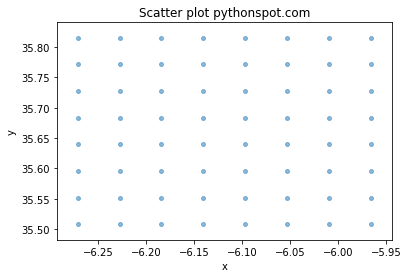

In [15]:
import matplotlib.pyplot as plt
x=[ i[0] for i in arrayPoint]
y=[ i[1] for i in arrayPoint]
map_name=[ i[2] for i in arrayPoint]

area = np.pi*5

plt.scatter(x, y, s=area, alpha=0.5)
plt.title('Scatter plot pythonspot.com')
plt.xlabel('x')
plt.ylabel('y')
plt.show()


In [16]:
#Put the map to the correct position
arrayPoint.sort()
list_map=[i[0] for i in arrayPoint]

In [17]:
list_=[]

for i in [1,2,3,4,5,6,7,8]:
    list_.append([j[2] for j in arrayPoint[(i-1)*8:i*8]])

df_map=pd.DataFrame({})
count=0
for i in np.array(list_).T:
    k=list(i)
    k.reverse()
    df_map["{}".format(count)]=k
    count+=1

In [18]:
df_map

,0,1,2,3,4,5,6,7
0,3001120103000,3001120103001,3001120103010,3001120103011,3001120103100,3001120103101,3001120103110,3001120103111
1,3001120103002,3001120103003,3001120103012,3001120103013,3001120103102,3001120103103,3001120103112,3001120103113
2,3001120103020,3001120103021,3001120103030,3001120103031,3001120103120,3001120103121,3001120103130,3001120103131
3,3001120103022,3001120103023,3001120103032,3001120103033,3001120103122,3001120103123,3001120103132,3001120103133
4,3001120103200,3001120103201,3001120103210,3001120103211,3001120103300,3001120103301,3001120103310,3001120103311
5,3001120103202,3001120103203,3001120103212,3001120103213,3001120103302,3001120103303,3001120103312,3001120103313
6,3001120103220,3001120103221,3001120103230,3001120103231,3001120103320,3001120103321,3001120103330,3001120103331
7,3001120103222,3001120103223,3001120103232,3001120103233,3001120103322,3001120103323,3001120103332,3001120103333


In [21]:
!rm Data/df_map.csv
df_map.to_csv("df_map.csv")

rm: Data/df_map.csv: No such file or directory


# Find the shortest distance

In [23]:
#Import population
pop_dens=pd.read_csv("Data/tz_popdens_sample.csv")
print(len(pop_dens))

101563


In [24]:
# This function returns the matrix of population density that is in each tile.
def pop_dens_map(maps):
    df_map=pd.read_csv("Data/ml_preds_csv/{}.csv".format(maps))
    row_=df_map.iloc[0]
    
    x_0=row_.latitude-i_unit*row_.pixel_i
    x_n=x_0+8192*i_unit
    y_0=row_.longitude-j_unit*row_.pixel_j
    y_n=y_0+8192*j_unit

    fool = pop_dens[(pop_dens['latitude']>x_0)&(pop_dens['latitude']<x_n)&(pop_dens['longitude']>y_0)&(pop_dens['longitude']<y_n)]
    return fool 

In [25]:
df_map.iloc[1,1]

3001120103003

In [26]:
def clean_map(maps):
    df_map=pd.read_csv("Data/ml_preds_csv/{}.csv".format(maps))
    return df_map[df_map['val']>75]

In [32]:
def l2_norm(p1,p2):
    distsq=(p1[0]-p2[0])**2+(p1[1]-p2[1])**2
    return distsq

In [33]:
df_map.head()

,0,1,2,3,4,5,6,7
0,3001120103000,3001120103001,3001120103010,3001120103011,3001120103100,3001120103101,3001120103110,3001120103111
1,3001120103002,3001120103003,3001120103012,3001120103013,3001120103102,3001120103103,3001120103112,3001120103113
2,3001120103020,3001120103021,3001120103030,3001120103031,3001120103120,3001120103121,3001120103130,3001120103131
3,3001120103022,3001120103023,3001120103032,3001120103033,3001120103122,3001120103123,3001120103132,3001120103133
4,3001120103200,3001120103201,3001120103210,3001120103211,3001120103300,3001120103301,3001120103310,3001120103311


In [34]:
listOfFile[:5]

[3001120103333, 3001120103131, 3001120103130, 3001120103332, 3001120103330]

### Some testing

In [35]:
num_pop=[]
for i in listOfFile:
    num_pop.append(len(pop_dens_map(i)))

In [36]:
np.array(num_pop).sum()

93977

In [37]:
len(pop_dens)

101563

In [38]:
# For each image id, open the pandas matrix.
# df_map gives you the id.
maps=3001120103000
df_maps=pd.read_csv("Data/ml_preds_csv/{}.csv".format(maps))

In [39]:
len(pop_dens_map(3001120103000))

0

In [40]:
print(df_maps.latitude.min(),df_maps.latitude.max(),df_maps.longitude.min(),df_maps.longitude.max())

-6.009453902907334 -5.965753671065527 35.5078125 35.55175244808197


In [41]:
print(pop_dens.latitude.min(),pop_dens.latitude.max(),pop_dens.longitude.min(),pop_dens.longitude.max())

-6.31506018824 -5.9658935187800015 35.50796484532001 35.85935373702


So there are some sample that is not in our maps set. Especially, one of the map (3001120103000) has no population.

## Work

In [46]:
#Define the 8*8192 by 8*8192 boolean array for a big map
full_image = np.zeros((8192*8,8*8192),dtype=np.uint8)
for i in range(len(df_map)):
    for j in range(len(df_map)):
        maps = df_map.iloc[i,j]
        df_maps=pd.read_csv("Data/ml_preds_csv/{}.csv".format(maps))
        indx = df_maps.index[df_maps['val'] > 75]
        sss = df_maps[['pixel_i','pixel_j']]
        A = np.zeros((8192,8192),dtype=np.uint8)
        pixels = sss.iloc[indx].to_numpy()
        for k in range(len(pixels)):
            A[pixels[k,0],pixels[k,1]] = int(1)
        full_image[i*8192:(i+1)*8192,j*8192:(j+1)*8192] = int(1) - A

In [47]:
full_image[1000:12215]

array([[1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       ...,
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1]], dtype=uint8)

In [48]:
print(full_image.nbytes/1000000)

4294.967296


In [49]:
class Node():
    """A node class for A* Pathfinding"""

    def __init__(self, parent=None, position=None):
        self.parent = parent
        self.position = position

        self.g = 0
        self.h = 0
        self.f = 0

    def __eq__(self, other):
        return self.position == other.position


def astar(maze, start, end):
    """Returns a list of tuples as a path from the given start to the given end in the given maze"""

    # Create start and end node
    start_node = Node(None, start)
    start_node.g = start_node.h = start_node.f = 0
    end_node = Node(None, end)
    end_node.g = end_node.h = end_node.f = 0

    # Initialize both open and closed list
    open_list = []
    closed_list = []

    # Add the start node
    open_list.append(start_node)

    # Loop until you find the end
    while len(open_list) > 0:

        # Get the current node
        current_node = open_list[0]
        current_index = 0
        for index, item in enumerate(open_list):
            if item.f < current_node.f:
                current_node = item
                current_index = index

        # Pop current off open list, add to closed list
        open_list.pop(current_index)
        closed_list.append(current_node)

        # Found the goal
        if current_node == end_node:
            path = []
            current = current_node
            while current is not None:
                path.append(current.position)
                current = current.parent
            return path[::-1] # Return reversed path

        # Generate children
        children = []
        for new_position in [(0, -1), (0, 1), (-1, 0), (1, 0), (-1, -1), (-1, 1), (1, -1), (1, 1)]: # Adjacent squares

            # Get node position
            node_position = (current_node.position[0] + new_position[0], current_node.position[1] + new_position[1])

            # Make sure within range
            if node_position[0] > (len(maze) - 1) or node_position[0] < 0 or node_position[1] > (len(maze[len(maze)-1]) -1) or node_position[1] < 0:
                continue

            # Make sure walkable terrain
            if maze[node_position[0]][node_position[1]] != 0:
                continue

            # Create new node
            new_node = Node(current_node, node_position)

            # Append
            children.append(new_node)

        # Loop through children
        for child in children:

            # Child is on the closed list
            for closed_child in closed_list:
                if child == closed_child:
                    continue

            # Create the f, g, and h values
            child.g = current_node.g + 1
            child.h = ((child.position[0] - end_node.position[0]) ** 2) + ((child.position[1] - end_node.position[1]) ** 2)
            child.f = child.g + child.h

            # Child is already in the open list
            for open_node in open_list:
                if child == open_node and child.g > open_node.g:
                    continue

            # Add the child to the open list
            open_list.append(child)

In [50]:
# Compute distance for each pair of points. 
routing_pairs=pd.read_csv("Data/routing_challenge_pairs.csv")
print(routing_pairs.head(0))
routing_pairs = routing_pairs.to_numpy()
top_most = 35.50781250000051
left_most = -6.271618064314865
(routing_pairs[0,0] - left_most)/j_unit

Empty DataFrame
Columns: [latitude_src, longitude_src, latitude_dst, longitude_dst]
Index: []


18107.72301148285

In [52]:
routing_pairs

array([[-6.17448067, 35.75299323, -6.26538966, 35.73208272],
       [-5.99512902, 35.80006599, -6.13030311, 35.69733202],
       [-6.1996798 , 35.67715645, -6.1620378 , 35.71311414],
       ...,
       [-6.19572273, 35.72348356, -6.20351955, 35.76038003],
       [-6.15498702, 35.81344485, -6.12816423, 35.72463691],
       [-6.11070118, 35.65276444, -6.0642833 , 35.62570095]])

In [55]:
def main(start, end):
    
    maze = full_image #[[0, 1, 0, 0, 1, 0, 0, 0, 0, 0],
            #[0, 1, 0, 0, 1, 0, 0, 0, 0, 0],
            #[0, 0, 0, 0, 1, 0, 0, 0, 1, 0],
            #[0, 0, 1, 0, 1, 0, 0, 0, 0, 0],
            #[0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
            #[0, 1, 0, 0, 1, 0, 0, 0, 0, 0],
            #[0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
            #[0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
            #[0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
            #[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]]

    path = astar(maze, start, end)
    print(path)
    return(path)

In [56]:
routing_pairs[0]

array([-6.17448067, 35.75299323, -6.26538966, 35.73208272])

In [265]:
path = np.array(path)
count_diag = 0
count_horiz = 0
count_vert = 0

for i in range(len(path)-1):
    if (    np.abs(path[i+1] - path[i]).sum() == 2):
        count_diag += 1
    elif( np.abs(path[i+1,1] - path[i,1]) == 1):
        count_horiz += 1
    else: 
        count_vert += 1

dist = count_horiz * i_unit + count_vert * j_unit + count_diag * (np.sqrt(i_unit**2+j_unit**2))
dist

5.8324786822154745e-05

In [268]:
j_unit

5.3644180155743015e-06

In [54]:
df_maps.head()

,pixel_i,pixel_j,val,latitude,longitude
0,0,241,7,-6.271618,35.816723
1,0,242,21,-6.271618,35.816728
2,0,243,36,-6.271618,35.816733
3,0,244,42,-6.271618,35.816739
4,0,245,43,-6.271618,35.816744


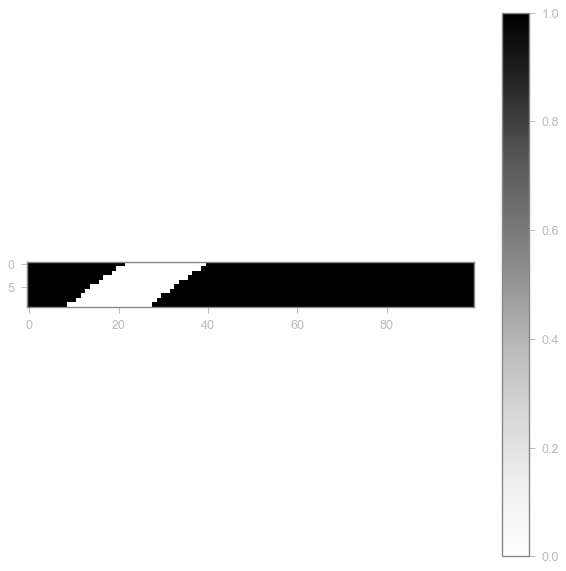

In [237]:
import numpy as np
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
plt.imshow(full_image[0:10,4400:4500],cmap='Greys',  interpolation='nearest')
plt.colorbar()
plt.show()

In [59]:
a=clean_map(3001120103121).sample(2)

### Population that close to a road for each map

In [132]:
newpop=pop_dens_map(3001120103121).reset_index()
newmap1=clean_map(3001120103121).reset_index()
a=newpop[['latitude','longitude']]
b=newmap1[['latitude','longitude']]

In [133]:
for i in range(len(newpop)):
    aa=a.iloc[i].values
    listDumb=[]
    
    array_truth=[]
    
    k=((aa-np.array(b.values))**2)
    count=((k.reshape(2,-1)[0]+k.reshape(2,-1)[1])<radius**2).sum()    
    if count>0:
        v=1
    else:
        v=0
    listDumb.append(v)

In [134]:
listDumb

[0]

In [136]:
def pop_dens_map2(maps):
    df_map=pd.read_csv("Data/ml_preds_csv/{}.csv".format(maps))
    x_n=df_map['latitude'].max()
    x_0=df_map['latitude'].min()
    y_n=df_map['longitude'].max()
    y_0=df_map['longitude'].min()
    fool=pop_dens[(pop_dens['latitude']>x_0)&(pop_dens['latitude']<x_n)&(pop_dens['longitude']>y_0)&(pop_dens['longitude']<y_n)]
    return fool

In [138]:
len(pop_dens_map2(3001120103000))

1002